In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [25]:
d=loadmat("dataset/DREAMER.mat")

In [ ]:
# dream=d["DREANER"]

In [26]:
def mat_scalar(x):
    """Safely extract MATLAB scalar wrapped in arrays"""
    try:
        return x.item()
    except Exception:
        return x


In [28]:
dreamer = d["DREAMER"][0, 0]
data = dreamer["Data"]

valence, arousal, dominance = [], [], []

n_subjects, n_trials = data.shape

for s in range(n_subjects):
    for t in range(n_trials):
        trial = data[s, t]
        valence.append(mat_scalar(trial["ScoreValence"]))
        arousal.append(mat_scalar(trial["ScoreArousal"]))
        dominance.append(mat_scalar(trial["ScoreDominance"]))

valence   = np.asarray(valence).ravel()
arousal   = np.asarray(arousal).ravel()
dominance = np.asarray(dominance).ravel()

print(valence.shape, arousal.shape, dominance.shape)


(414,) (414,) (414,)


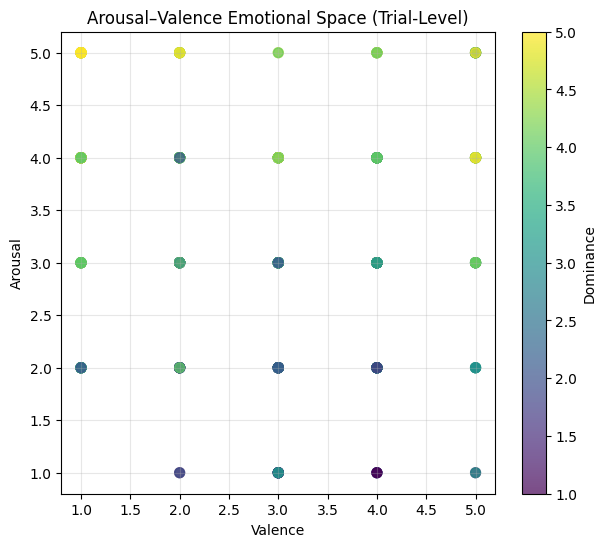

In [29]:
plt.figure(figsize=(7, 6))

sc = plt.scatter(
    valence,
    arousal,
    c=dominance,
    cmap="viridis",
    alpha=0.7,
    s=50
)

plt.colorbar(sc, label="Dominance")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Arousal–Valence Emotional Space (Trial-Level)")
plt.grid(True, alpha=0.3)

plt.show()


In [ ]:
val_s, aro_s, dom_s = [], [], []

for t in range(n_trials):
    v_t, a_t, d_t = [], [], []
    for s in range(n_subjects):
        trial = data[s, t]
        v_t.append(mat_scalar(trial["ScoreValence"]))
        a_t.append(mat_scalar(trial["ScoreArousal"]))
        d_t.append(mat_scalar(trial["ScoreDominance"]))
    val_s.append(np.mean(v_t))
    aro_s.append(np.mean(a_t))
    dom_s.append(np.mean(d_t))

x = np.arange(n_trials)


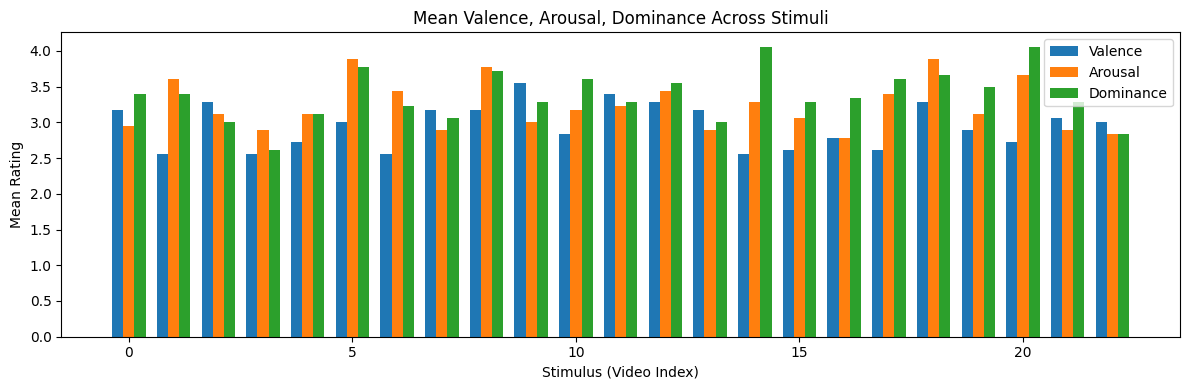

In [31]:
plt.figure(figsize=(12, 4))

plt.bar(x - 0.25, val_s, width=0.25, label="Valence")
plt.bar(x,         aro_s, width=0.25, label="Arousal")
plt.bar(x + 0.25, dom_s, width=0.25, label="Dominance")

plt.xlabel("Stimulus (Video Index)")
plt.ylabel("Mean Rating")
plt.title("Mean Valence, Arousal, Dominance Across Stimuli")
plt.legend()
plt.tight_layout()

plt.show()


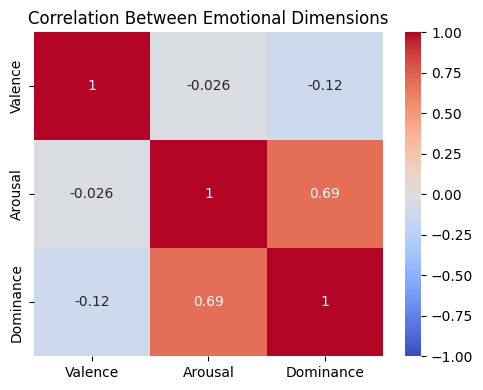

In [32]:
vad = np.vstack([valence, arousal, dominance]).T
corr = np.corrcoef(vad, rowvar=False)

labels = ["Valence", "Arousal", "Dominance"]

plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

plt.title("Correlation Between Emotional Dimensions")
plt.tight_layout()
plt.show()


In [33]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

def describe_vector(name, x):
    print(f"\n=== {name} ===")
    print(f"Count        : {len(x)}")
    print(f"Min / Max    : {np.min(x)} / {np.max(x)}")
    print(f"Mean         : {np.mean(x):.3f}")
    print(f"Std Dev      : {np.std(x):.3f}")
    print(f"Median       : {np.median(x)}")
    print(f"25% / 75%    : {np.percentile(x, 25)} / {np.percentile(x, 75)}")
    print(f"Unique values: {np.unique(x)}")

def quadrant_counts(valence, arousal):
    v_med = np.median(valence)
    a_med = np.median(arousal)

    q1 = np.sum((valence >= v_med) & (arousal >= a_med))  # High V, High A
    q2 = np.sum((valence <  v_med) & (arousal >= a_med))  # Low V, High A
    q3 = np.sum((valence <  v_med) & (arousal <  a_med))  # Low V, Low A
    q4 = np.sum((valence >= v_med) & (arousal <  a_med))  # High V, Low A

    print("\n=== Arousal–Valence Quadrant Counts (Median Split) ===")
    print(f"High Valence, High Arousal : {q1}")
    print(f"Low  Valence, High Arousal : {q2}")
    print(f"Low  Valence, Low  Arousal : {q3}")
    print(f"High Valence, Low  Arousal : {q4}")

def correlation_report(x, y, name_x, name_y):
    p_r, p_p = pearsonr(x, y)
    s_r, s_p = spearmanr(x, y)

    print(f"\n=== Correlation: {name_x} vs {name_y} ===")
    print(f"Pearson r     : {p_r:.3f} (p = {p_p:.3e})")
    print(f"Spearman rho  : {s_r:.3f} (p = {s_p:.3e})")

# ---------- RUN EVERYTHING ----------

print("\n################ PHASE 1 INTERPRETATION SUMMARY ################")

describe_vector("Valence", valence)
describe_vector("Arousal", arousal)
describe_vector("Dominance", dominance)

quadrant_counts(valence, arousal)

correlation_report(valence, arousal, "Valence", "Arousal")
correlation_report(valence, dominance, "Valence", "Dominance")
correlation_report(arousal, dominance, "Arousal", "Dominance")

print("\n===============================================================")



################ PHASE 1 INTERPRETATION SUMMARY ################

=== Valence ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 2.952
Std Dev      : 1.318
Median       : 3.0
25% / 75%    : 2.0 / 4.0
Unique values: [1 2 3 4 5]

=== Arousal ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 3.229
Std Dev      : 1.080
Median       : 3.0
25% / 75%    : 2.0 / 4.0
Unique values: [1 2 3 4 5]

=== Dominance ===
Count        : 414
Min / Max    : 1 / 5
Mean         : 3.374
Std Dev      : 1.069
Median       : 3.0
25% / 75%    : 3.0 / 4.0
Unique values: [1 2 3 4 5]

=== Arousal–Valence Quadrant Counts (Median Split) ===
High Valence, High Arousal : 176
Low  Valence, High Arousal : 124
Low  Valence, Low  Arousal : 37
High Valence, Low  Arousal : 77

=== Correlation: Valence vs Arousal ===
Pearson r     : -0.026 (p = 5.958e-01)
Spearman rho  : -0.017 (p = 7.260e-01)

=== Correlation: Valence vs Dominance ===
Pearson r     : -0.116 (p = 1.846e-02)
Spearman rho  : -0.108 (p = 2.852e-

# Phase 1 — Exploratory Analysis & Emotional Space Interpretation (DREAMER)

## Overview
This phase analyzes the **emotional ground truth** of the DREAMER dataset before any EEG processing. Using **trial-level analysis** (23 subjects × 18 stimuli = **414 trials**), we validate whether the provided Valence–Arousal–Dominance (VAD) ratings are structured, theory-consistent, and suitable for downstream affect recognition.

---

## 1. Distribution of Emotional Ratings

All three dimensions span the full Likert scale **[1–5]**, confirming complete coverage of the intended emotional range.

### Valence
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **2.95**, Median: **3**  
- Std Dev: **1.32**  
- IQR (25%–75%): **2–4**

**Interpretation:**  
Valence is centered around neutrality with relatively high variability, indicating diverse perceptions of pleasantness across trials.

### Arousal
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **3.23**, Median: **3**  
- Std Dev: **1.08**  
- IQR (25%–75%): **2–4**

**Interpretation:**  
Arousal shows a slight bias toward higher values, reflecting that audio-visual stimuli tend to elicit emotionally intense responses.

### Dominance
- Count: 414  
- Min / Max: 1 / 5  
- Mean: **3.37**, Median: **3**  
- Std Dev: **1.07**  
- IQR (25%–75%): **3–4**

**Interpretation:**  
Dominance ratings are more tightly clustered, suggesting greater agreement among participants regarding perceived control or engagement.

---

## 2. Arousal–Valence Emotional Space (Quadrant Analysis)

Using a **median split** (Valence = 3, Arousal = 3), all four emotional quadrants are populated:

- **High Valence, High Arousal:** 176 trials  
- **Low Valence, High Arousal:** 124 trials  
- **Low Valence, Low Arousal:** 37 trials  
- **High Valence, Low Arousal:** 77 trials  

**Interpretation:**  
The distribution spans all quadrants, forming a **circumplex-like structure** consistent with established affective models. However, the dataset is biased toward **high-arousal states**, while low-arousal & low-valence emotions are underrepresented. This reflects the nature of audio-visual stimuli and foreshadows potential **class imbalance** in later classification tasks.

---

## 3. Correlation Analysis Between Emotional Dimensions

### Valence ↔ Arousal
- Pearson r = **−0.026** (p = 0.596)  
- Spearman ρ = **−0.017** (p = 0.726)

**Interpretation:**  
No significant relationship exists between valence and arousal, indicating that **emotional pleasantness and intensity are statistically independent** in this dataset.

### Valence ↔ Dominance
- Pearson r = **−0.116** (p = 0.018)  
- Spearman ρ = **−0.108** (p = 0.029)

**Interpretation:**  
A weak but significant negative correlation suggests that certain negative emotions may still be associated with a sense of control (e.g., focused anger or determination), highlighting that dominance is not simply a proxy for positivity.

### Arousal ↔ Dominance
- Pearson r = **0.693** (p ≪ 0.001)  
- Spearman ρ = **0.698** (p ≪ 0.001)

**Interpretation:**  
A strong positive correlation indicates that **higher emotional intensity is closely linked to increased perceived dominance or engagement**. This suggests partially overlapping affective constructs and potentially shared neural correlates.

---

## 4. Key Takeaways

- The DREAMER dataset exhibits a **well-structured emotional ground truth** aligned with the **Circumplex Model of Affect**.
- Valence and arousal are **independent dimensions**, justifying separate affect recognition tasks.
- Arousal and dominance are **strongly coupled**, which may influence feature redundancy in classification.
- Emotional responses are biased toward **high-arousal states**, implying class imbalance considerations for later stages.
- Trial-level analysis preserves meaningful **inter-subject variability**, strengthening downstream modeling.

**Conclusion:**  
Phase 1 confirms that the emotional labels in DREAMER are psychologically valid, statistically sound, and suitable for EEG-based affect recognition.

---
